In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_frame(ax, T, name="", axis_length=100):
    """
    Plot a coordinate frame from a 4x4 homogeneous transform.
    """
    origin = T[:3, 3]
    R = T[:3, :3]

    # Axes directions
    x_axis = origin + axis_length * R[:, 0]
    y_axis = origin + axis_length * R[:, 1]
    z_axis = origin + axis_length * R[:, 2]

    # Plot axes
    ax.plot([origin[0], x_axis[0]],
            [origin[1], x_axis[1]],
            [origin[2], x_axis[2]], 'r')
    
    ax.plot([origin[0], y_axis[0]],
            [origin[1], y_axis[1]],
            [origin[2], y_axis[2]], 'g')
    
    ax.plot([origin[0], z_axis[0]],
            [origin[1], z_axis[1]],
            [origin[2], z_axis[2]], 'b')

    ax.text(origin[0], origin[1], origin[2], name)


def visualize_frames(*transforms):
    """
    Visualize multiple frames in 3D from a list of 4x4 transformation matrices.
    
    Args:
    - transforms (list): List of 4x4 transformation matrices.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the base frame (identity)
    plot_frame(ax, np.eye(4), "Base", axis_length=150)

    # Iterate through all provided transformations and plot each one
    for idx, T in enumerate(transforms):
        name = f"Frame {idx + 1}"  # Dynamically name each frame (Frame 1, Frame 2, etc.)
        plot_frame(ax, T, name)

    # Labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Set box aspect ratio
    ax.set_box_aspect([1, 1, 1])

    plt.show()




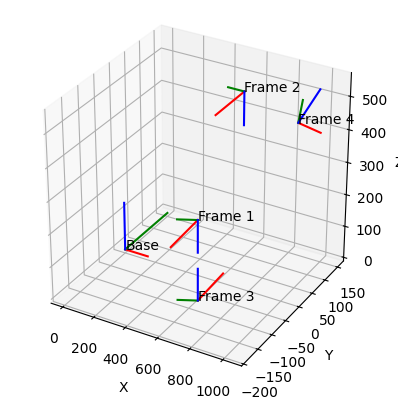

In [14]:
T_base2cam = np.array([[-0.00020363,          -1, -0.00020498,      644.11],
              [         -1,  0.00020371, -0.00040735,       66.92],
              [ 0.00040739,   0.0002049,          -1,      528.51],
              [          0,           0,           0,           1]])

T_base2ob = np.array([[   -0.15846,    -0.98736,  0.00020498,      627.47],
             [    0.98736,    -0.15846,  0.00040735,     -83.714],
             [-0.00036972,  0.00026694,           1,      3.1709],
             [          0,           0,           0,           1]])

T_base2goal = np.array([[    0.15846,    -0.98736, -0.00020498,      627.52],
                        [   -0.98736,    -0.15846, -0.00040735,     -83.613],
                        [ 0.00036972,  0.00026694,          -1,      253.17],
                        [          0,           0,           0,           1]])

T_base2link = np.array([[ 0.39504, -0.76177,  0.51347,  985.26],
                        [ 0.61549,  0.63441,  0.46765,   58.188],
                        [-0.68199,  0.13129,  0.71948,  486.41],
                        [ 0,        0,        0,        1]])

visualize_frames(T_base2goal, T_base2cam, T_base2ob, T_base2link)

